In [1]:
from funcoes_auxiliares import *

pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_rows = 6

In [2]:
estado = "MG"

In [3]:
nome_arquivo_alimentacao = "../dados-limpos/aquisicao_por_classe_de_rendimento_e_estado/%s/dados-limpos/%s_alimentacao.csv" % (estado, estado)

In [4]:
nome_arquivo_despesas = "../dados-limpos/aquisicao_por_classe_de_rendimento_e_estado/%s/dados-limpos/%s_tipos_despesas.csv" % (estado, estado)

### Carregando os datasets de acordo com o estado

In [5]:
df_despesas = carregar_dataset_e_converter_dados(nome_arquivo_despesas)

In [6]:
df_despesas

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesa total,4390.72,1501.78,2271.56,3697.32,6575.93,9589.42,14391.83,23891.78
1,Despesas correntes,4082.30,1457.93,2159.63,3510.91,6027.63,8811.94,13263.37,20768.46
2,Despesas de consumo,3635.92,1392.69,2039.02,3247.30,5409.91,7559.27,10752.93,15961.57
...,...,...,...,...,...,...,...,...,...
92,Prestação de imóvel,46.30,4.62,13.36,26.47,97.15,86.72,236.52,412.36
93,Número de famílias,7149295.00,1392069.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
94,Tamanho médio da família,2.93,2.36,2.69,3.13,3.48,3.11,2.93,3.02


In [7]:
df_alimentos = carregar_dataset_e_converter_dados(nome_arquivo_alimentacao)

In [8]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesas com alimentação,688.51,327.38,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Alimentação no domicílio,421.18,233.71,310.48,432.82,562.13,664.21,784.44,1013.62
2,"Cereais, leguminosas e oleaginosas",22.81,21.01,20.50,23.90,22.86,22.67,33.65,30.67
...,...,...,...,...,...,...,...,...,...
83,Outras,47.94,29.26,48.33,51.90,67.03,38.61,47.58,35.43
84,Número de famílias,7149295.00,1392069.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
85,Tamanho médio da família,2.93,2.36,2.69,3.13,3.48,3.11,2.93,3.02


## Parte 3

### Acima foi feito apenas uma limpeza dos dados e conversão de tipos (Etapa 2 do trabalho).

A documentação dos dados originais não é muito bem detalhada, e nem possui informações sobre as colunas do dataset, focando apenas nas suas informações gerais. Com isso, decidimos remover a coluna 'Total' porque não conseguimos encontrar um detalhamento e um significado sobre o que ela representa, e também a coluna "Despesa monetária e não monetária média mensal familiar (R$)" que não encontramos aplicação até o momento.

In [9]:
df_alimentos = df_alimentos.drop(columns=['Total'])
df_alimentos = df_alimentos.drop(columns=['Despesa monetária e não monetária média mensal familiar (R$)'])

In [10]:
df_despesas = df_despesas.drop(columns=['Total'])
df_despesas = df_despesas.drop(columns=['Despesa monetária e não monetária média mensal familiar (R$)'])

Remoção das três primeiras linhas (despesas), que também não conseguimos achar seus significados exatos.

In [11]:
df_despesas = df_despesas.drop([0, 1, 2]).reset_index(drop=True)

In [12]:
df_despesas

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Habitação,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
2,Aluguel,423.40,581.47,799.82,1098.35,1430.00,2098.02
...,...,...,...,...,...,...,...
89,Prestação de imóvel,13.36,26.47,97.15,86.72,236.52,412.36
90,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
91,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02


O dataset de alimentos possui apenas uma linha com "despesas", que também não sabemos quais são os critérios para o cálculo. Por isso, optamos por remover também.

In [13]:
df_alimentos = df_alimentos.drop([0]).reset_index(drop=True)

In [14]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,13.31,15.60,13.85,12.66,14.22,12.00
...,...,...,...,...,...,...,...
82,Outras,48.33,51.90,67.03,38.61,47.58,35.43
83,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
84,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02


Cálculo da soma total de gastos com despesas distribuídos por classe.

A soma é feita para se ter um parâmetro de comparação, permitindo relacionar um determinado tipo de despesa com o consumo total gasto pela classe social.

A ideia disso é poder ver o quanto essa despesa é relevante para a classe, além de nos dizer também em média quantos porcentos do salário é dedicado à ela.

In [15]:
df_despesas = retorna_dataset_com_soma_colunas_classes_sociais(df_despesas)

In [16]:
df_despesas

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Habitação,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
2,Aluguel,423.40,581.47,799.82,1098.35,1430.00,2098.02
...,...,...,...,...,...,...,...
90,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
91,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02
92,Total gasto por classes,4723.72,7618.75,13440.48,19663.04,29365.22,48634.53


In [17]:
df_alimentos = retorna_dataset_com_soma_colunas_classes_sociais(df_alimentos)

In [18]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,13.31,15.60,13.85,12.66,14.22,12.00
...,...,...,...,...,...,...,...
83,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
84,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02
85,Total gasto por classes,1213.81,1756.74,2422.97,2943.34,3699.75,5071.83


## Análise para despesas gerais

Quantidade de itens para o top N itens que mais são consumidos dentre as despesas

In [19]:
qtd_top_itens = 5

Quantidade exata de linhas para exibir no dataset

In [20]:
pd.options.display.max_rows = qtd_top_itens + 1

### Análise para a primeira classe social "Até 1908 (2)"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [21]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, 'Até 1908 (2)', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2)
1,Habitação,817.04
0,Alimentação,470.26
2,Aluguel,423.40
4,Aluguel não monetário,343.97
6,Serviços e taxas,237.69
92,Total gasto por classes,4723.72


Plot da mesma lista acima, ignorando o total de gastos por classe

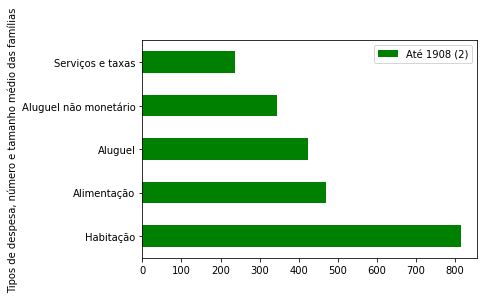

In [22]:
plot_grafico_barras_lista_top_N_itens(df_despesas, 'Até 1908 (2)', qtd_top_itens, 'green')

### Análise para a segunda classe social "Mais de 1908 a 2862"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [23]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, 'Mais de 1908 a 2862', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 1908 a 2862
1,Habitação,1148.45
0,Alimentação,682.91
2,Aluguel,581.47
26,Transporte,530.95
4,Aluguel não monetário,503.24
92,Total gasto por classes,7618.75


Plot da mesma lista acima, ignorando o total de gastos por classe

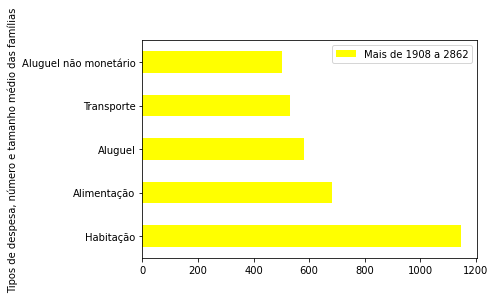

In [24]:
plot_grafico_barras_lista_top_N_itens(df_despesas, 'Mais de 1908 a 2862', qtd_top_itens, 'yellow')

### Análise para a terceira classe social "Mais de 2862 a 5724"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [25]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, 'Mais de 2862 a 5724', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 2862 a 5724
1,Habitação,1658.10
26,Transporte,1089.90
0,Alimentação,965.76
2,Aluguel,799.82
4,Aluguel não monetário,700.82
92,Total gasto por classes,13440.48


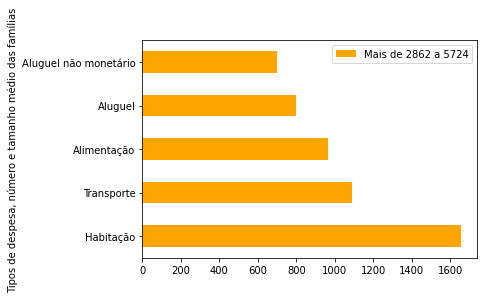

In [26]:
plot_grafico_barras_lista_top_N_itens(df_despesas, 'Mais de 2862 a 5724', qtd_top_itens, 'orange')

### Análise para a quarta classe social "Mais de 5724 a 9540"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [27]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, 'Mais de 5724 a 9540', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 5724 a 9540
1,Habitação,2278.54
26,Transporte,1811.58
76,Outras despesas correntes,1252.66
0,Alimentação,1183.04
2,Aluguel,1098.35
92,Total gasto por classes,19663.04


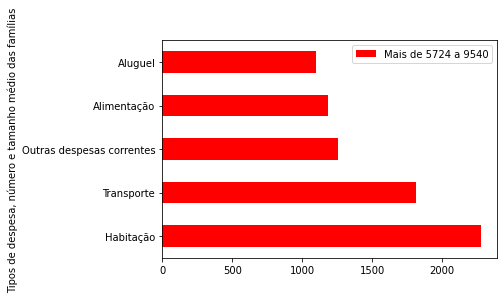

In [28]:
plot_grafico_barras_lista_top_N_itens(df_despesas, 'Mais de 5724 a 9540', qtd_top_itens, 'red')

### Análise para a quinta classe social "Mais de 9540 a 14310"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [29]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, 'Mais de 9540 a 14310', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 9540 a 14310
1,Habitação,3102.18
26,Transporte,2537.54
76,Outras despesas correntes,2510.44
0,Alimentação,1511.11
2,Aluguel,1430.00
92,Total gasto por classes,29365.22


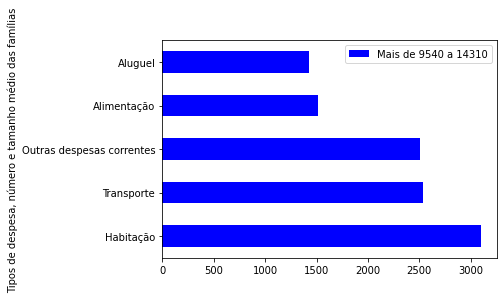

In [30]:
plot_grafico_barras_lista_top_N_itens(df_despesas, 'Mais de 9540 a 14310', qtd_top_itens, 'blue')

### Análise para a quarta classe social "Mais de 14310 a 23850"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [31]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, 'Mais de 14310 a 23850', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 14310 a 23850
76,Outras despesas correntes,4806.89
1,Habitação,4744.36
26,Transporte,3792.67
83,Aumento do ativo,2472.91
0,Alimentação,2111.32
92,Total gasto por classes,48634.53


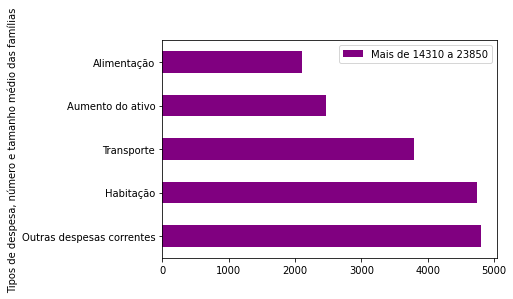

In [32]:
plot_grafico_barras_lista_top_N_itens(df_despesas, 'Mais de 14310 a 23850', qtd_top_itens, 'purple')